# Improving the well-being of children around the world

<img src="http://www.familygateway.co.uk/wp-content/uploads/2017/04/Happy-children-Family-Gateway.jpg" width="600px">

# Description

The main aim of the project is to track the impact of living conditions of students aged 15 to 22 on their math performance in order to identify students at an early stage at risk.

The given data set includes the various variables as nominative and numeric data. All data is not hidden which allow us to make the proper analysis of it.

Score - is the target variable that we will predict in our future model.

In [1]:
from jupyterthemes import jtplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder  # To label Categorical data
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

%matplotlib inline

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

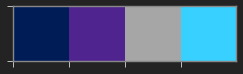

In [2]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

# 1. Basic data information

In [3]:
df_math = pd.read_csv("stud_math.csv")

print(f'df_math shape: {df_math.shape}')

df_math shape: (395, 30)


In [4]:
display(df_math.head(10))
df_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 2. Exploratory Data Analysis

### *2.1 Target variable analysis*

Text(0.5, 0, 'Scores')

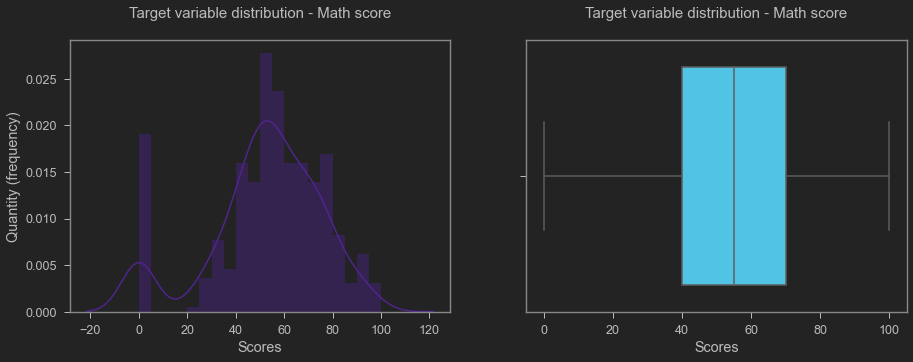

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(df_math.score.values, bins=20, color=colors[1])
plt.title('Target variable distribution - Math score\n', fontsize=15)
plt.xlabel('Scores')
plt.ylabel('Quantity (frequency)')

plt.subplot(122)
sns.boxplot(df_math.score.values, color=colors[3])
plt.title('Target variable distribution - Math score\n', fontsize=15)
plt.xlabel('Scores')

In [6]:
df_math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

The target variable has a normal distribution of 0 to 100. The first and third quartiles are in the range from about 40 to 70, the median is 55, we also note that there are quite a lot of scores with zero and we might suspect that score was not given to students. 

### *2.2 Data types*

In [7]:
df_math.dtypes.value_counts()

object     17
float64    12
int64       1
dtype: int64

We may see that our data set has 3 types of variables.

Let's see into it more closer

In [8]:
# Columns with a float type data
df_math.dtypes[df_math.dtypes == 'float']

Medu                   float64
Fedu                   float64
traveltime             float64
studytime              float64
failures               float64
studytime, granular    float64
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [9]:
dtype_df = df_math.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,12
2,object,17


In [10]:
# Show the object type data
df_math.dtypes[df_math.dtypes == 'object']

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

In [11]:
# Columns with a integer type data
df_math.dtypes[df_math.dtypes == 'int64']

age    int64
dtype: object

Now we want to get a look at the content of the categorical data

In [12]:
obj = df_math.dtypes[df_math.dtypes == 'object'].index
for i in obj:
    print(i, df_math[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']


Well, we see that some columns has two features, some more than two. Also we may notice that we have Nan values.

Do the same for numeric data

In [13]:
numeric = df_math.dtypes[df_math.dtypes == 'float'].index
for i in numeric:
    print(i, df_math[i].unique())

Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
studytime, granular [ -6.  -9.  -3.  nan -12.]
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
score [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]


As we might see some data is not available or with mistakes. Let's check how many null values our dataset has and try to fix problems if any.

In [14]:
# Sum of empty values in all dataset
empty_data = df_math.isna().sum()[df_math.isna().sum() > 0].reset_index()
empty_data.columns = ['Column', 'Count']
display(empty_data)

,Column,Count
0,address,17
1,famsize,27
2,Pstatus,45
3,Medu,3
4,Fedu,24
5,Mjob,19
6,Fjob,36
7,reason,17
8,guardian,31
9,traveltime,28


In further data proceeding, we may drop (or do something) lines with absent data if total empty cells are not exceeding 1% of the total amount of data in the column.
Four our case it might be the following empty data:

In [15]:
empty_data[empty_data['Count']/395 <= 0.01]
# where 395 is out total number of rows

,Column,Count
3,Medu,3


### *2.3 Data processing*

The categorical data has empty/or values with errors.
Let's fill it up

In [16]:
def filling_data(string):
    '''Function is called for the filling empty values in data set
    Input: Value in str type from data set
    Output: String with 'unknown' value '''

    if string.strip() == '':
        return 'unknown'
    if pd.isnull(string):
        return 'unknown'
    if string == 'nan':
        return 'unknown'
    return string

In [17]:
for i in obj:
    df_math[i] = df_math[i].astype(str).apply(filling_data)

Now we need to check whether our numeric data contains outliers.

Q1 of Medu is 2.0, Q3 of Medu is 4.0, Borders of outliers of Medu are -1.0 7.0
Q1 of Fedu is 2.0, Q3 of Fedu is 3.0, Borders of outliers of Fedu are 0.5 4.5
Q1 of traveltime is 1.0, Q3 of traveltime is 2.0, Borders of outliers of traveltime are -0.5 3.5
Q1 of studytime is 1.0, Q3 of studytime is 2.0, Borders of outliers of studytime are -0.5 3.5
Q1 of failures is 0.0, Q3 of failures is 0.0, Borders of outliers of failures are 0.0 0.0
Q1 of studytime, granular is -6.0, Q3 of studytime, granular is -3.0, Borders of outliers of studytime, granular are -10.5 1.5
Q1 of famrel is 4.0, Q3 of famrel is 5.0, Borders of outliers of famrel are 2.5 6.5
Q1 of freetime is 3.0, Q3 of freetime is 4.0, Borders of outliers of freetime are 1.5 5.5
Q1 of goout is 2.0, Q3 of goout is 4.0, Borders of outliers of goout are -1.0 7.0
Q1 of health is 3.0, Q3 of health is 5.0, Borders of outliers of health are 0.0 8.0
Q1 of absences is 0.0, Q3 of absences is 8.0, Borders of outliers of absences are -12.0 20.0
Q1

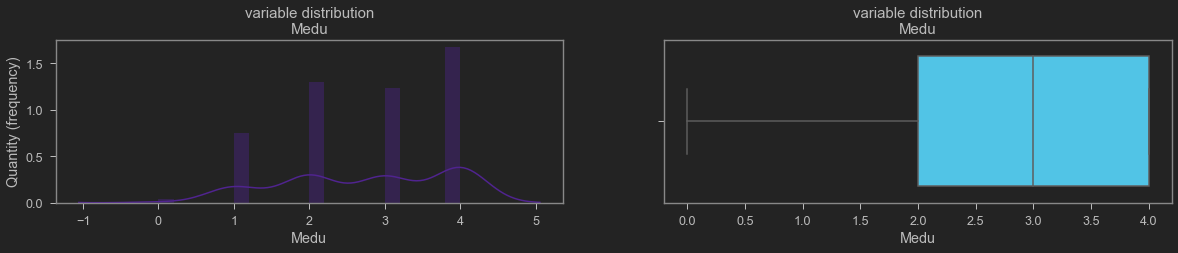

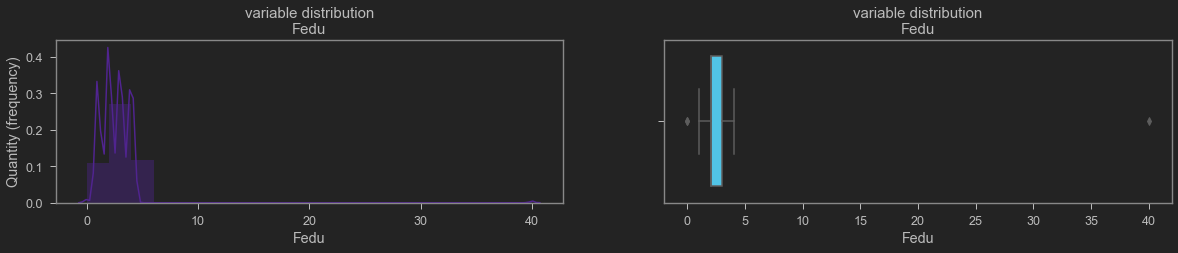

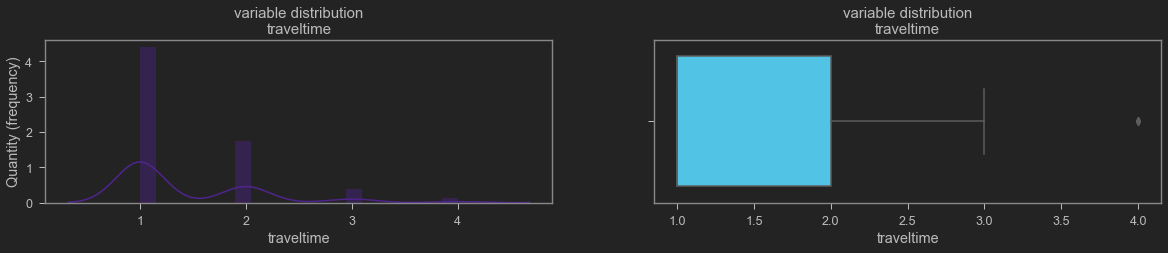

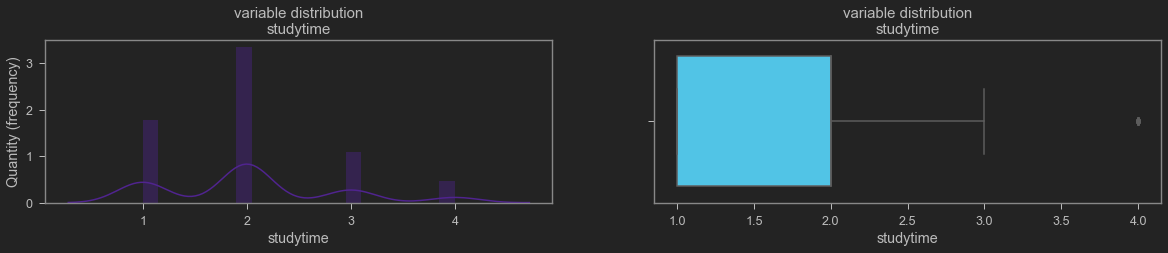

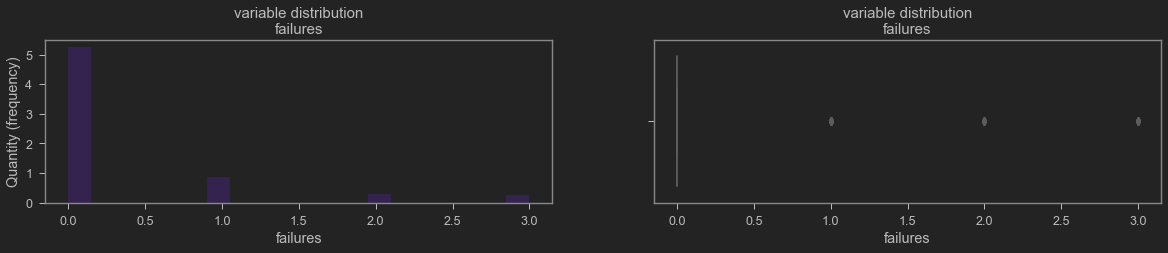

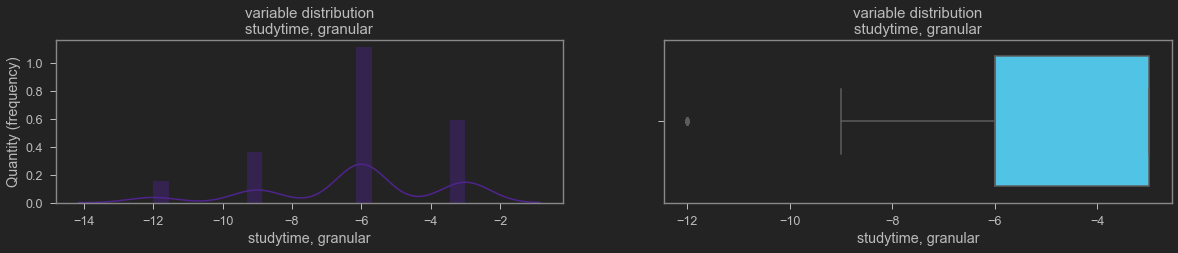

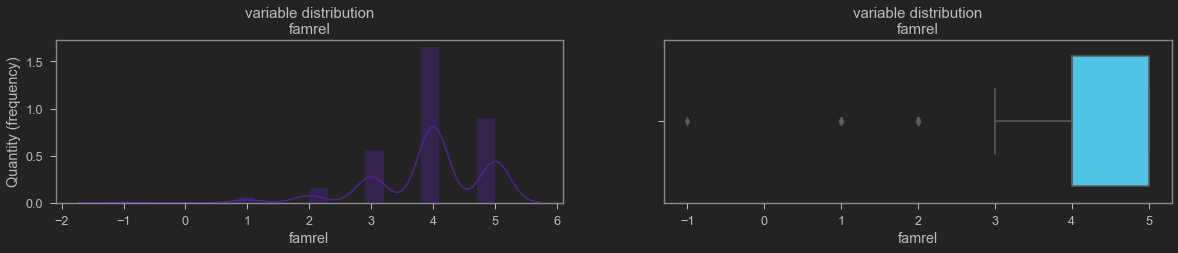

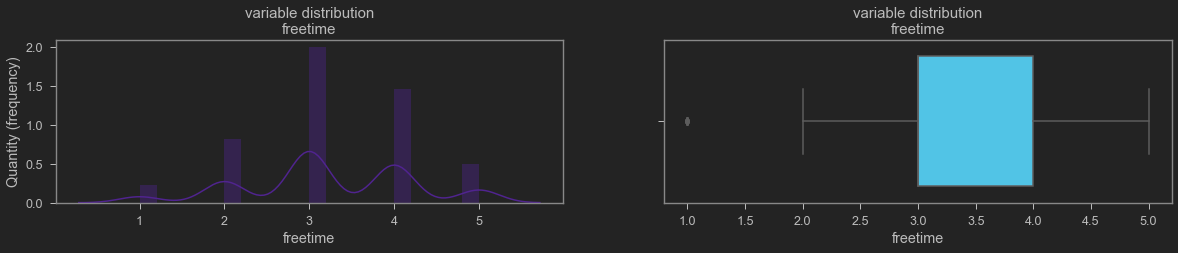

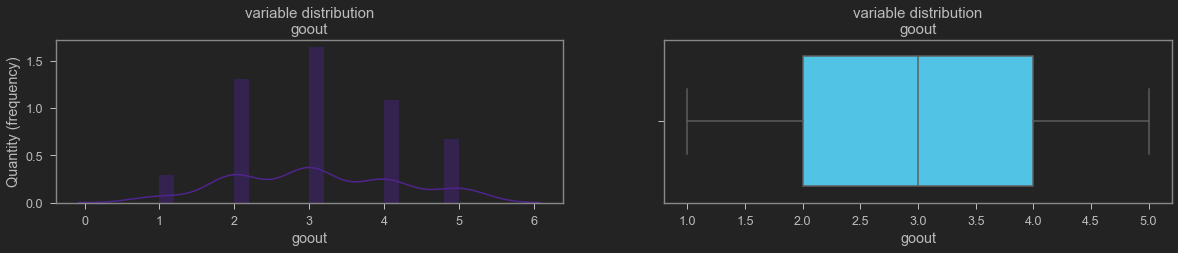

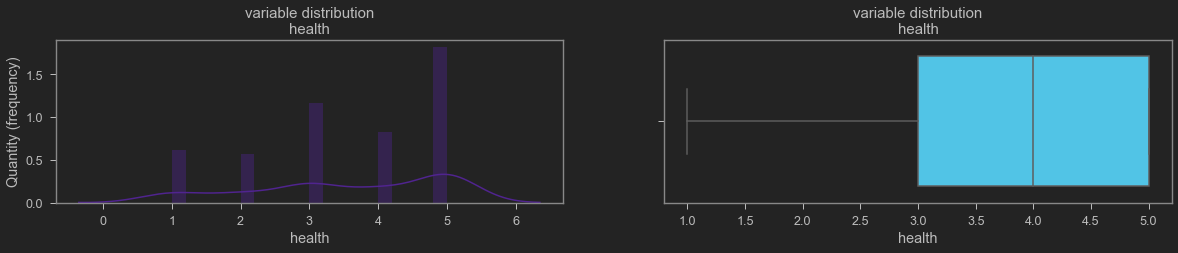

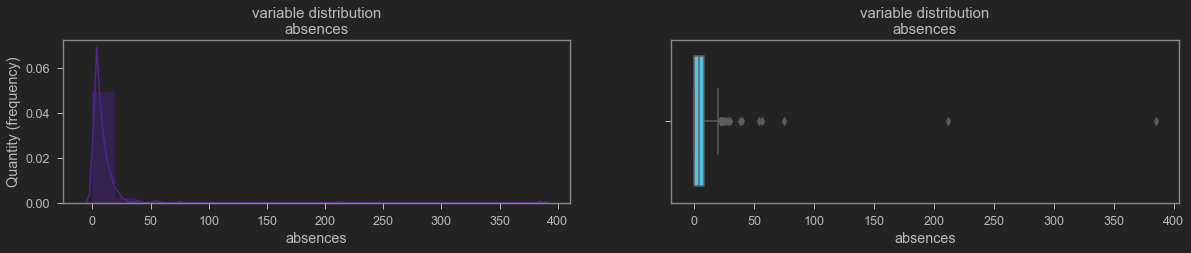

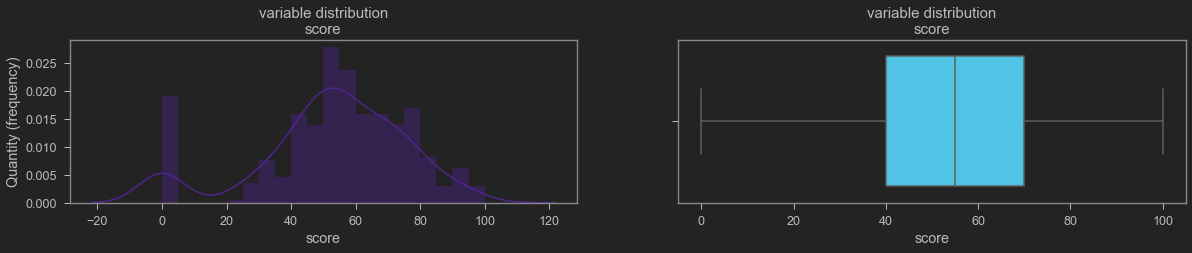

In [18]:
for i in numeric:
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    sns.distplot(df_math[i].values, bins=20, color=colors[1])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)
    plt.ylabel('Quantity (frequency)')

    plt.subplot(122)
    sns.boxplot(df_math[i].values, color=colors[3])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)

    IQR = df_math[i].quantile(0.75) - df_math[i].quantile(0.25)
    perc25 = df_math[i].quantile(0.25)
    perc75 = df_math[i].quantile(0.75)
    print(
        f'Q1 of {i} is {perc25}, Q3 of {i} is {perc75}, Borders of outliers of {i} are {perc25-1.5*IQR} {perc75+1.5*IQR}')

Let us see how zero scores distributed in our target (School) column.

GP    33
MS     4
Name: school, dtype: int64

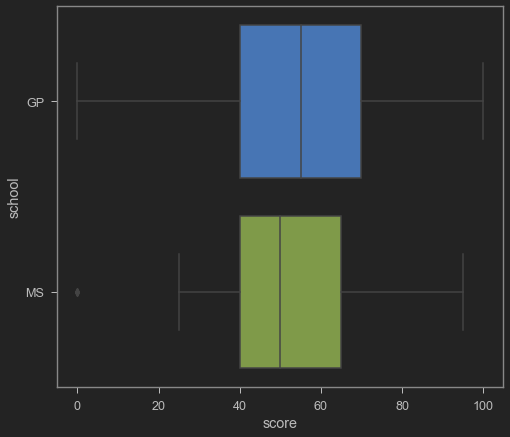

In [19]:
sns.boxplot(x='score', y='school', data=df_math)
# how many zero points
df_math[df_math['score'] == 0]['school'].value_counts()

Well, based on shown info we can see that some columsn has outliers:

*fedu*

*traveltime*

*studytime*

*studytime, granular*

*famrel (moreover, famrel has a value below 0, which is not correct. It supposed that values shall be from 0 to 5 and we can consider it as a mistake.)*

*freetime*

*absences*

*score* has interesting situation. Both school's students have math exams with zero points. 
We consider it as absence of a student, then clear those zero points from data set.

We will treat it
    

In [20]:
# fix the 'famrel' column (change -1 to 1)
df_math['famrel'] = df_math['famrel'].apply(lambda x: 1 if x == -1 else x)

In [21]:
# change Nan to most common in Medu column
df_math['Medu'] = df_math['Medu'].fillna(
    df_math['Medu'].value_counts().index[0])

In [22]:
# change Nan in score to median value
df_math['score'] = df_math['score'].fillna(df_math['score'].median())

In [23]:
# Clear outliers
clear_outl = ['Fedu', 'traveltime', 'studytime',
              'studytime, granular', 'freetime', 'famrel', 'score', 'absences']

for i in clear_outl:
    IQR = df_math[i].quantile(0.75) - df_math[i].quantile(0.25)
    perc25 = df_math[i].quantile(0.25)
    perc75 = df_math[i].quantile(0.75)
    df_math = df_math.loc[df_math[i].between(
        perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Let's see what have we got after clearing numeric values

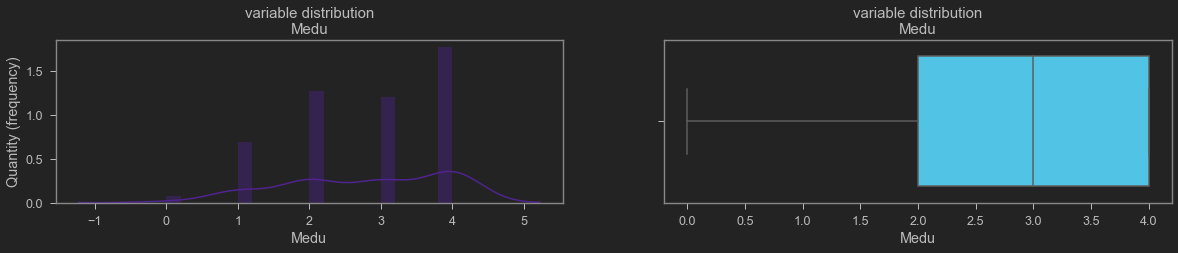

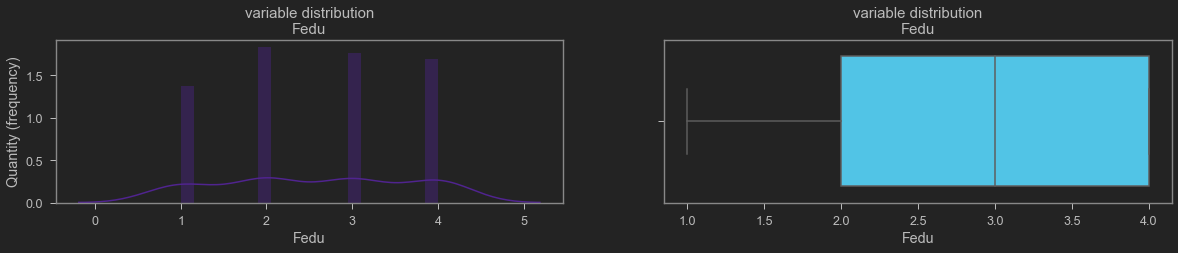

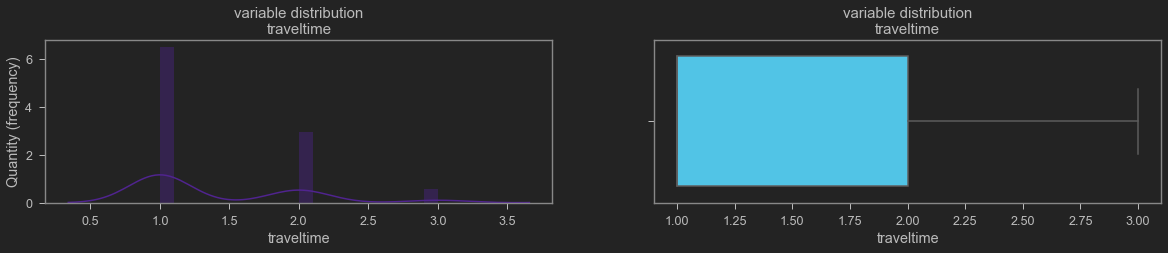

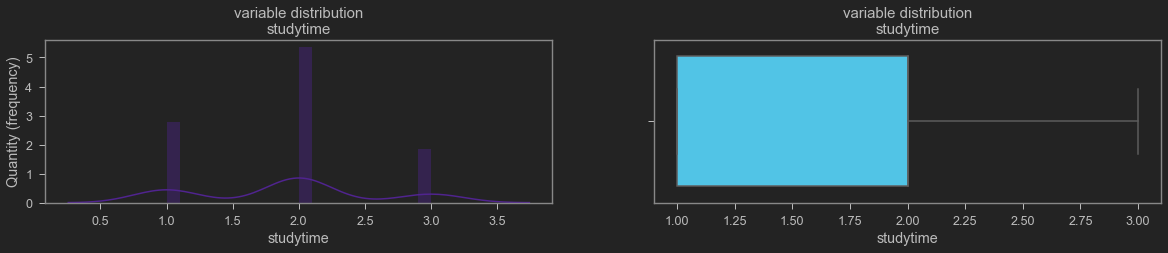

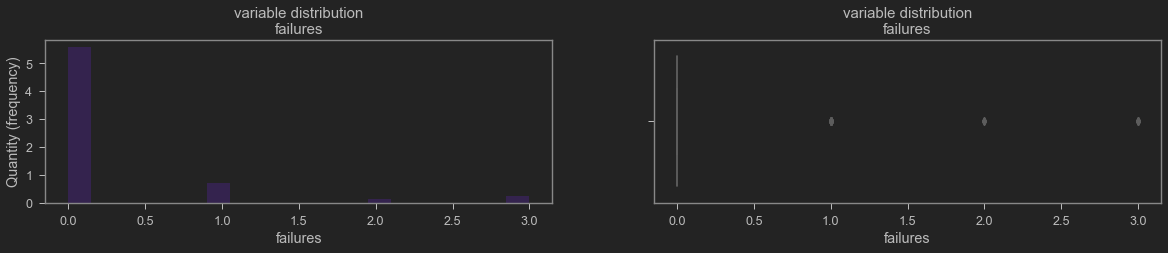

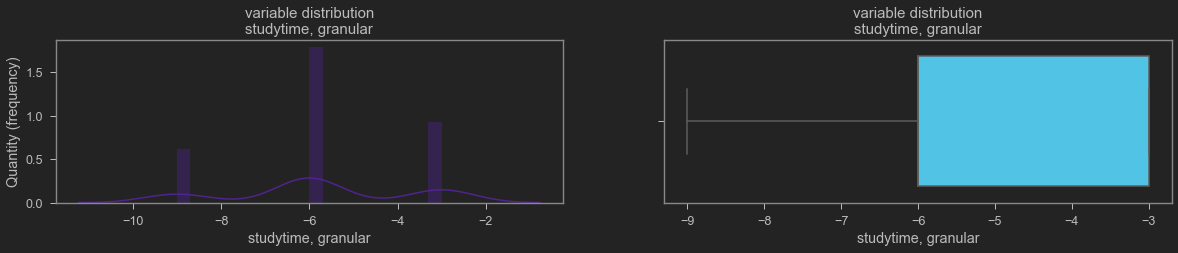

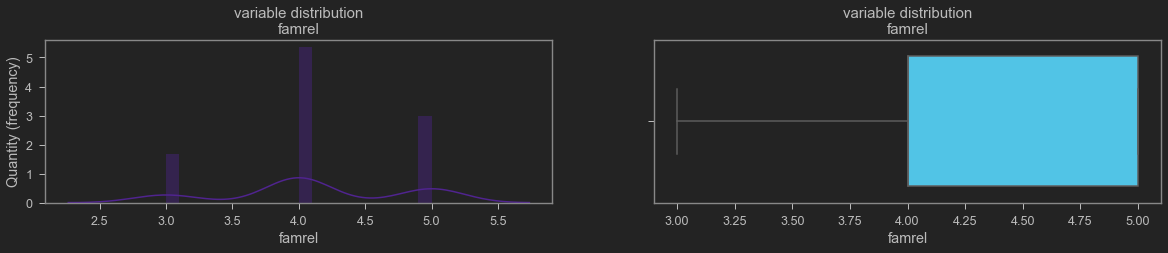

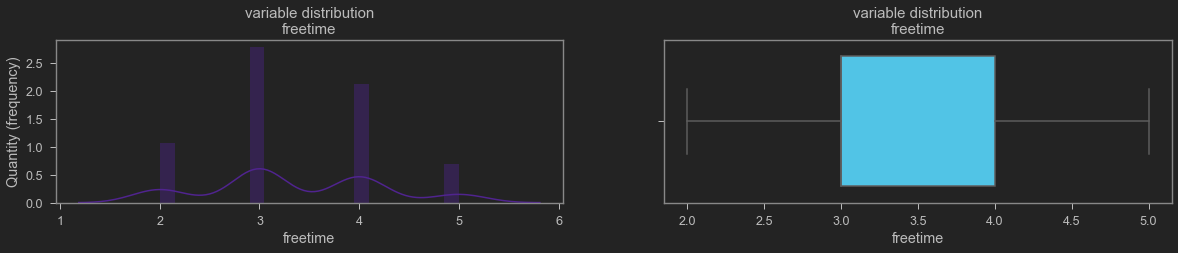

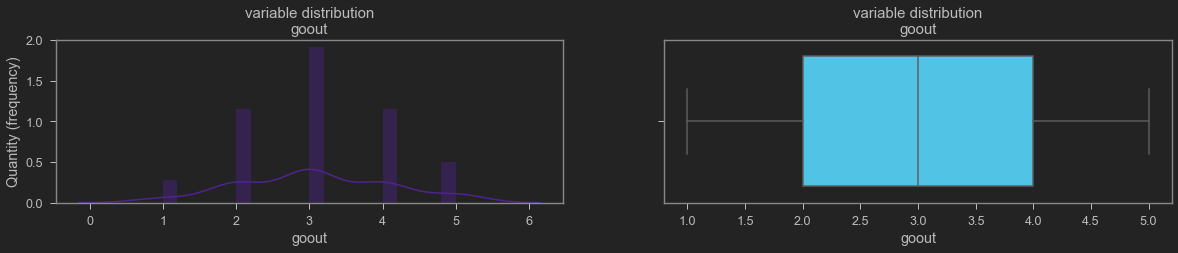

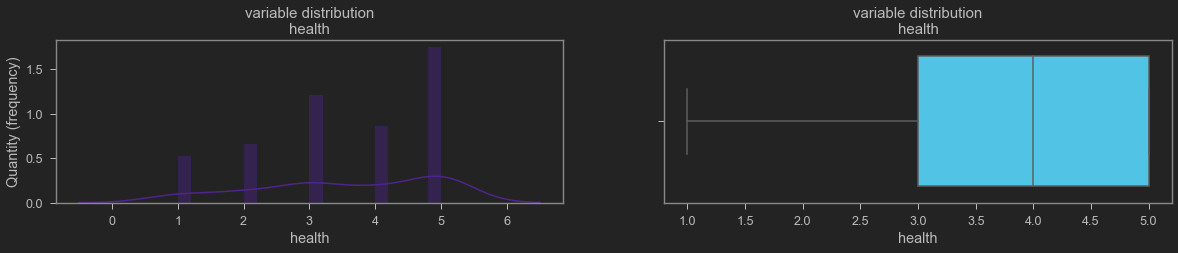

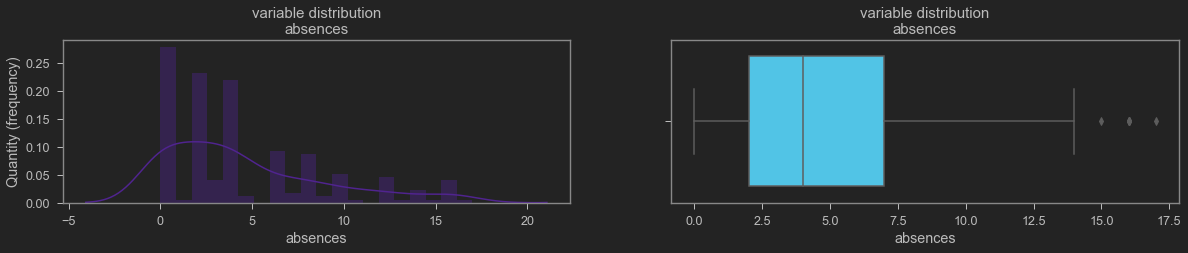

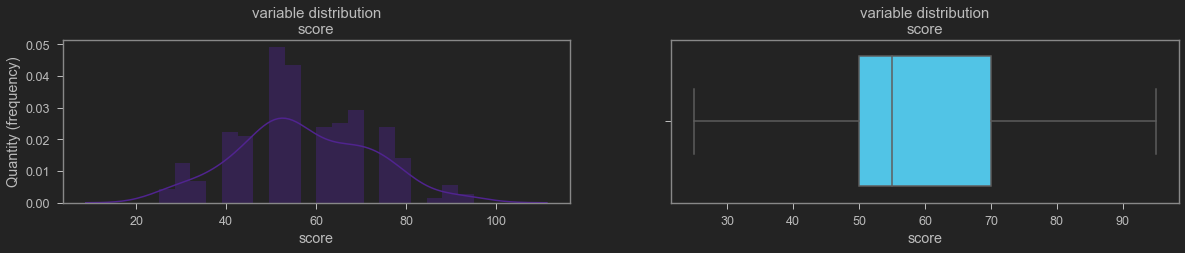

In [24]:
for i in numeric:
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    sns.distplot(df_math[i].values, bins=20, color=colors[1])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)
    plt.ylabel('Quantity (frequency)')

    plt.subplot(122)
    sns.boxplot(df_math[i].values, color=colors[3])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)

We still have integer column with Age. Let us clear outliers there

Text(0.5, 0, 'age')

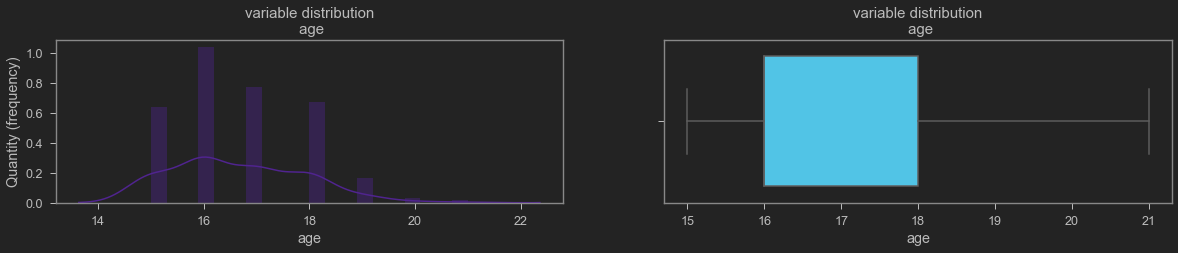

In [25]:
IQR = df_math['age'].quantile(0.75) - df_math['age'].quantile(0.25)
perc25 = df_math['age'].quantile(0.25)
perc75 = df_math['age'].quantile(0.75)
df_math = df_math.loc[df_math['age'].between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

plt.figure(figsize=(20, 3))
plt.subplot(121)
sns.distplot(df_math['age'].values, bins=20, color=colors[1])
plt.title('variable distribution\n age', fontsize=15)
plt.xlabel('age')
plt.ylabel('Quantity (frequency)')

plt.subplot(122)
sns.boxplot(df_math['age'].values, color=colors[3])
plt.title('variable distribution\n age', fontsize=15)
plt.xlabel('age')

Now it is much better. 

Absences yet have outlier, but we may see that max.value is about 17 hours, which is ok. Keep it.

### *2.4 CORRELATIONS*

#### *2.4.1 Categorical*

Let's see if scores distributions differ depending on the value of categorical variables.

In [26]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df_math.loc[df_math.loc[:, column].isin(
                    df_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

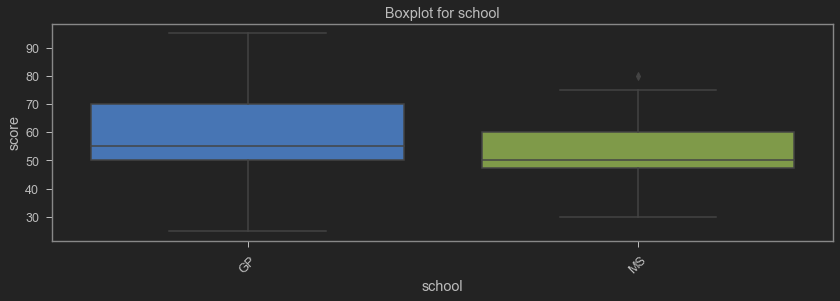

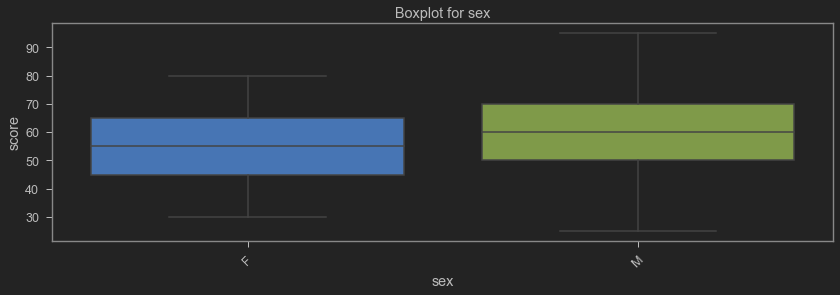

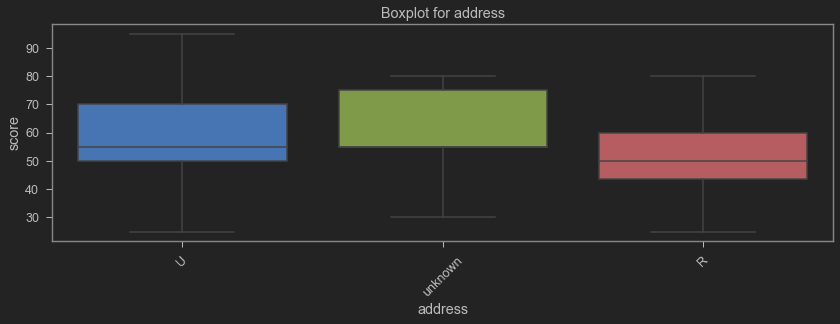

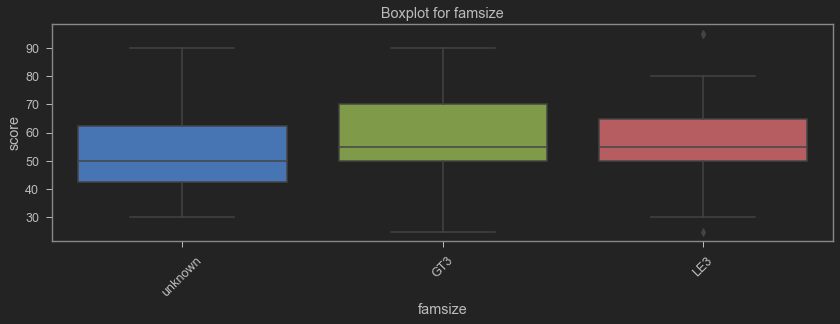

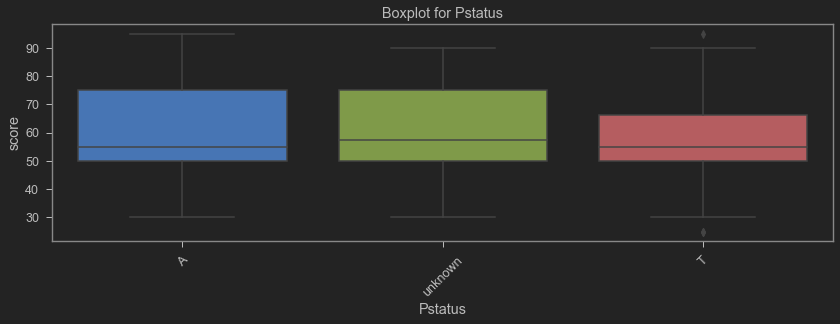

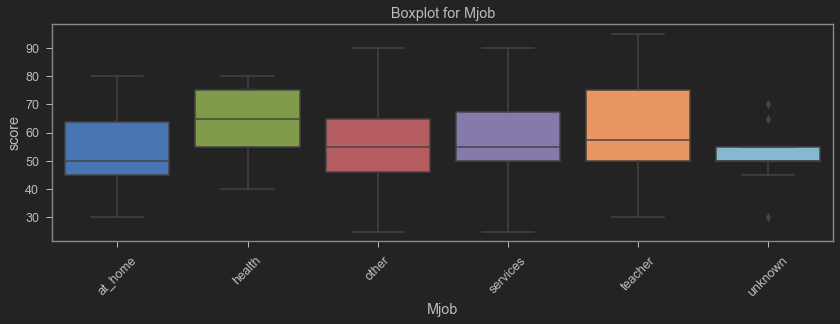

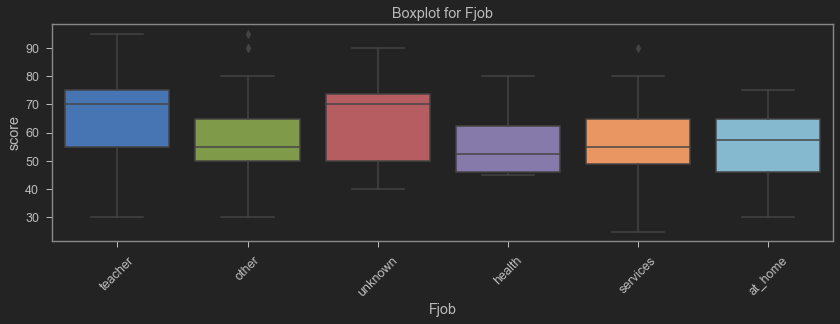

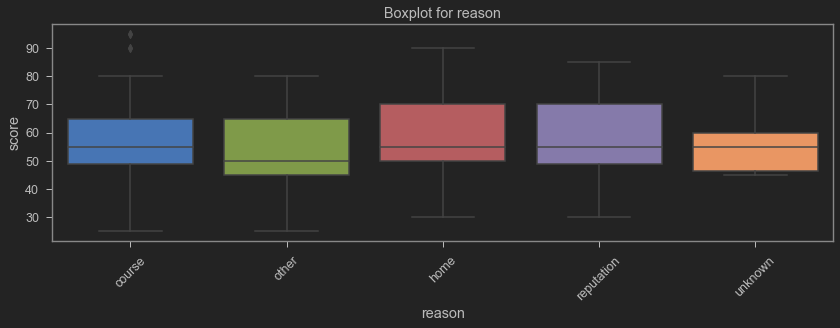

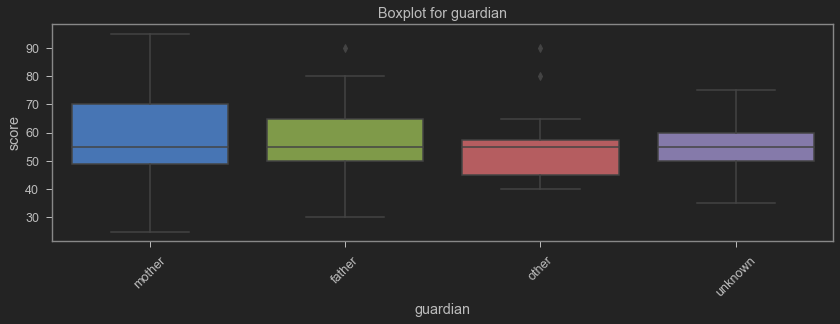

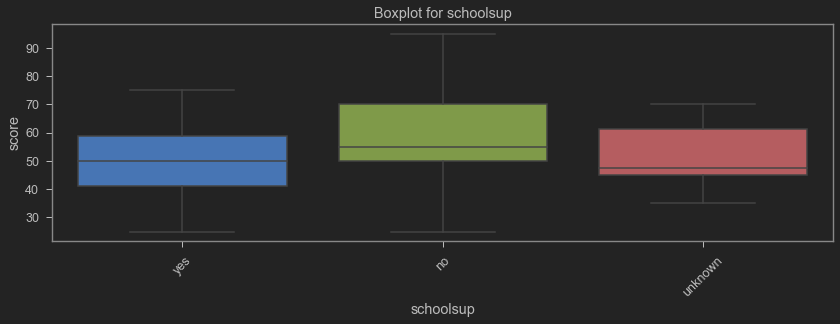

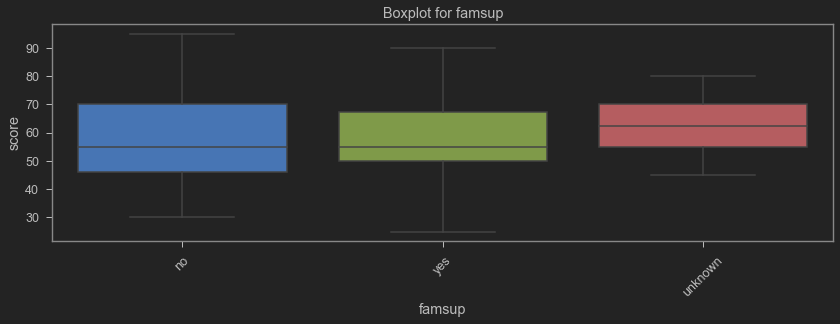

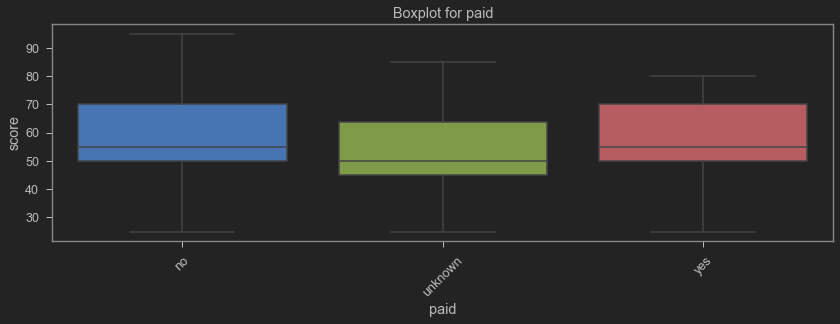

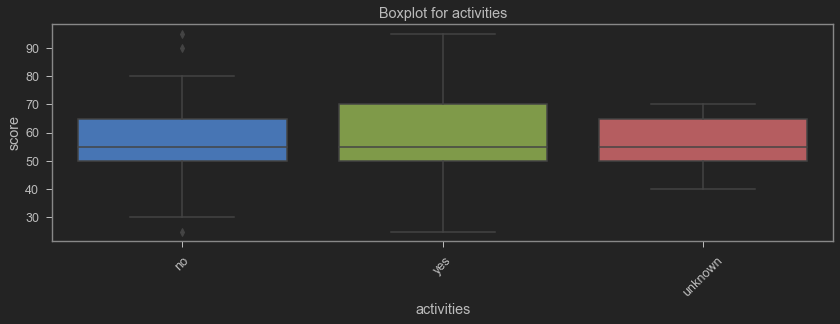

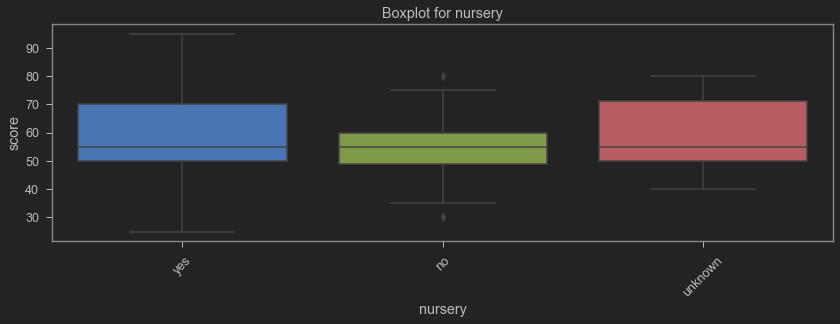

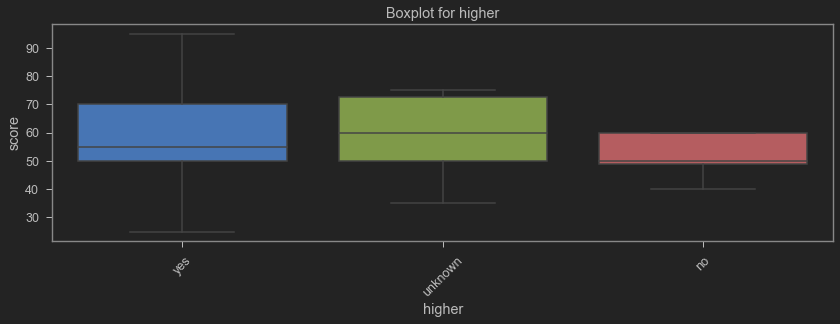

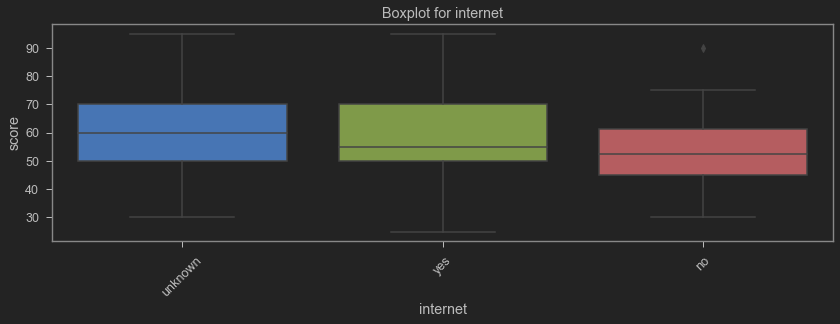

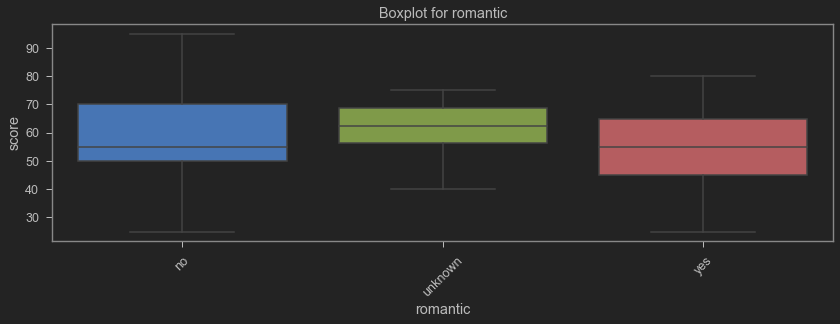

In [27]:
for col in obj:
    get_boxplot(col)

What outcomes can we see? 1) It is obvious that our scores shall be higher, then the best values in the variables at which score is maximum are 'School' 'Sex', and 'SchooSup'. (hypothesis: may affect on Score?)

2) Fjob has the greatest variety within variables, which can potentially indicate a greater usefulness of these variables.

3) rest of the variables have no such variety.

#### *a) Lets verify our hypothes*

In [28]:
#  t-test
def get_stat_dif(column):
    cols = df_math.loc[:, column].value_counts().index[:18]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_math.loc[df_math.loc[:, column] == comb[0], 'score'],
                     df_math.loc[df_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Bonferoni correction
            print('Found statistically significant differences for the column', column)
            break

In [29]:
for col in obj:
    get_stat_dif(col)

Found statistically significant differences for the column sex
Found statistically significant differences for the column address
Found statistically significant differences for the column schoolsup


For doublecheck we apply the Tukey test with p-value 0.05.

In [30]:
# Tukey test
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

for col in obj:
    MultiComp = MultiComparison(df_math['score'], df_math[col])
    print(f'Results for column: {col}\n{MultiComp.tukeyhsd().summary()} \n')

Results for column: school
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    GP     MS  -4.7212 0.1222 -10.719 1.2767  False
--------------------------------------------------- 

Results for column: sex
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     F      M   5.2931 0.0103 1.2619 9.3244   True
-------------------------------------------------- 

Results for column: address
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
     R       U   6.7565 0.0262   0.6451 12.8679   True
     R unknown     8.25  0.278  -4.4551 20.9551  False
     U unknown   1.4935    0.9 -10.3164 13.3034  False
------------------------------------------------------ 

Results for co

Results for column: internet
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
     no unknown    3.869 0.6268 -6.2266 13.9647  False
     no     yes   2.1916 0.7324 -4.9933  9.3764  False
unknown     yes  -1.6775 0.8659 -9.8128  6.4578  False
------------------------------------------------------ 

Results for column: romantic
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
     no unknown   3.9286 0.6033  -5.8772 13.7343  False
     no     yes   -1.886 0.6837  -7.4152  3.6432  False
unknown     yes  -5.8145 0.3874 -16.2205  4.5915  False
------------------------------------------------------- 



Well, it is found that only 3 colums has statistically differences. Lets copy these colums with categorical variables to our data set:

1) sex

2) address

3) schoolsup

#### *b) HeatMap*

In order for us to be able to do a correlation analysis for categorical variables, before that we need to transform these variables using LabelEncoder ()

In [31]:
# Create auxilliarry dataframe
df_aux = df_math.copy()

for i in obj:
    le = LabelEncoder()
    le.fit(list(df_math[i].values) + list(df_math[i].values))
    df_aux[i] = le.transform(list(df_math[i].values))

In [32]:
df_aux = df_aux[obj]
df_aux['score'] = df_math['score']
df_aux.head(1)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,score
0,0,0,1,2,0,0,4,0,1,2,0,0,0,2,2,1,0,30.0


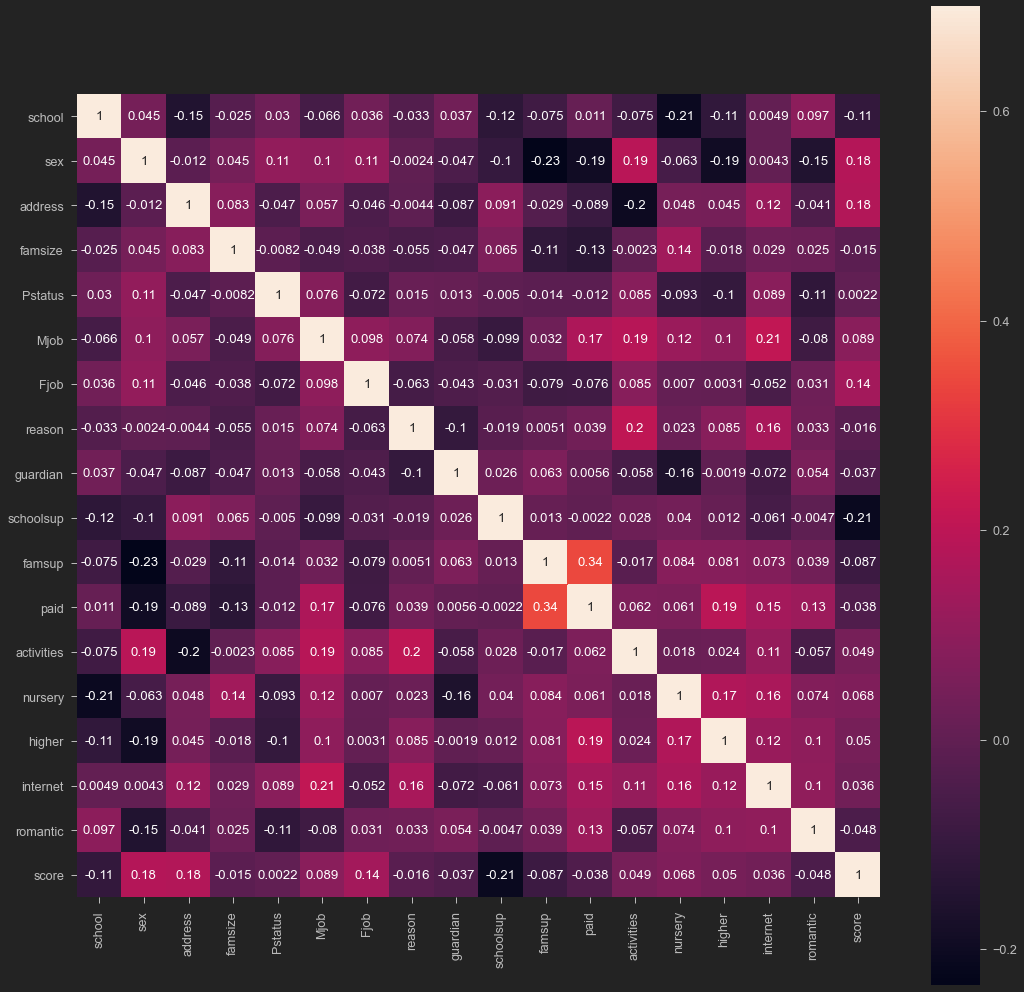

In [33]:
# HeatMap

corr = df_aux[df_aux.columns[0:18]].corr()

fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, vmax=.7, square=True, annot=True)

Best correlation is in following columns:

*Sex*

*address*

*Fjob*

*Schoolsoup*

Moreover there is no significant correlation between features.

To sumarize: We keep following colums:

sex,address,Fjob,Schoolsup 

Rest of categorical data will be dropped

In [34]:
cols = ['famsize', 'Mjob',
        'reason', 'guardian', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic', 'Pstatus']
df_math = df_math.drop(cols, axis=1)

#### *2.4.2 Numeric*

#### a) Correlation matrix

Rank of Matrix: 12
Determinator of matrix :-0.0


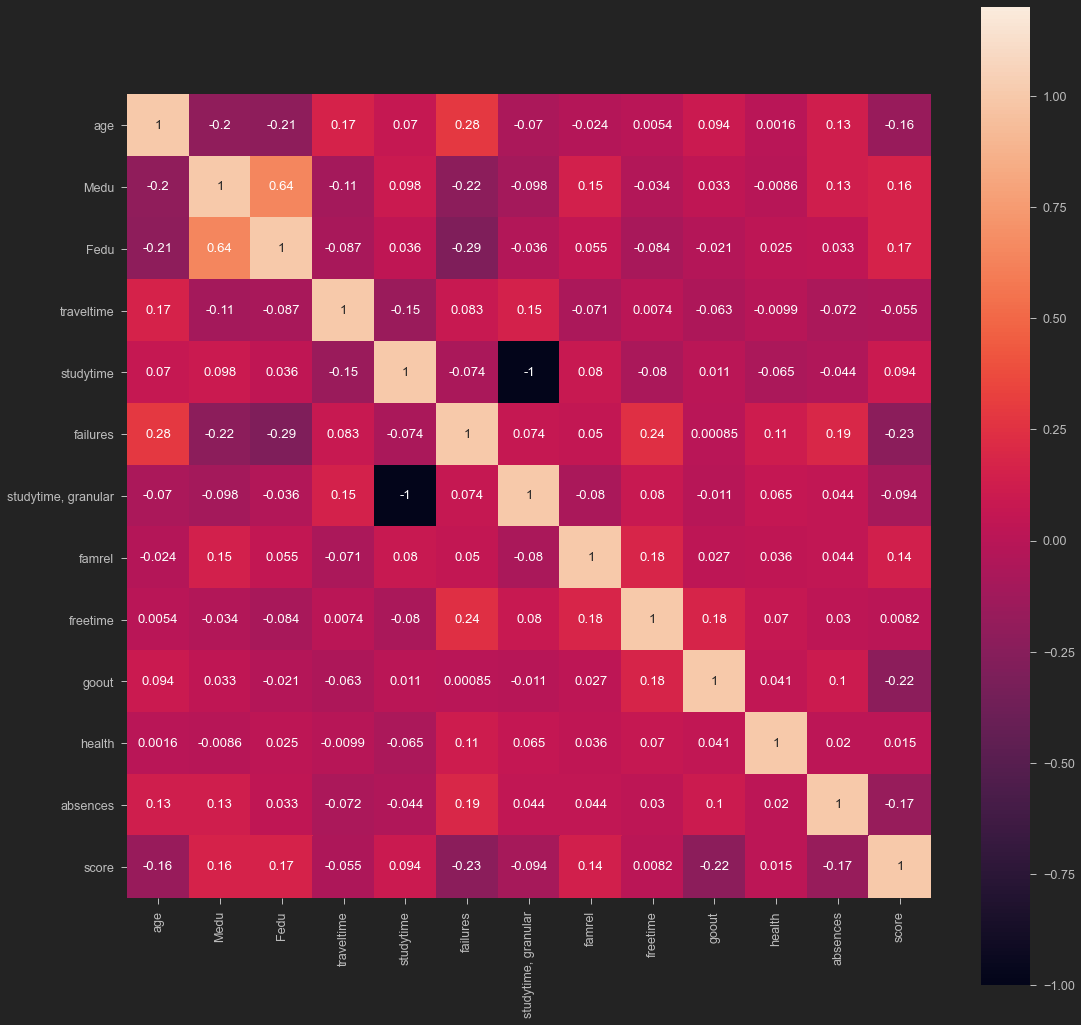

In [35]:
x = df_math.corr()
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x, vmax=1.2, square=True, annot=True)

print(f'Rank of Matrix: {np.linalg.matrix_rank(x)}')
print(f'Determinator of matrix :{round(np.linalg.det(x),1)}')

The StudyTime,Granular and Studytime are fully correletad. Drop one of them

In [36]:
df_math = df_math.drop(['studytime, granular'], axis=1)

#### b) Regression analysis

Multiple linear regression examines the effect of multiple independent variables on one traget variable

In [37]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='score ~ Medu + Fedu + traveltime + studytime'
             '+failures + famrel + freetime + goout + health + absences', data=df_math).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3.458
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           0.000368
Time:                        17:52:54   Log-Likelihood:                -733.79
No. Observations:                 183   AIC:                             1490.
Df Residuals:                     172   BIC:                             1525.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6291      9.227      5.704      0.000      34.416      70.842
Medu           1.5642      1.238      1.263      0.208      -0.880       4.008
Fedu          -0.5641      1.297     -0.435      0.664      -3.124       1.996
traveltime    -0.9194      1.716     -0.536      0.593      -4.307       2.468
studytime      1.3469      1.543      0.873      0.384      -1.700       4.393
failures      -5.1016      1.735     -2.940      0.004      -8.527      -1.676
famrel         1.9239      1.580      1.217      0.225      -1.196       5.043
freetime       1.5683      1.241      1.264      0.208      -0.881       4.017
goout         -3.5947      1.028     -3.497      0.001      -5.624      -1.566
health         0.3255      0.766      0.425      0.672      -1.187       1.838
absences      -0.3741      0.244     -1.534      0.127      -0.855       0.107
==============================================================================
Omnibus:                        0.283   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.438
Skew:                           0.043   Prob(JB):                        0.803
Kurtosis:                       2.776   Cond. No.                         90.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1)Because we got a p-value <0.05 for only two factors:'failures' and 'goout' then we can see that only these factors have a significant relationship with the investigated target variable - score. However, we need to veryfy whethrt there is other variables impact on target.

2) 12% (= Adj. R-squared) of the variability in our target variable is explained by this model.

3) The condition noumber is 90.9. This might indicate that there are no
strong multicollinearity or other numerical problems.

In [38]:
lm = smf.ols(
    formula='score ~ freetime + goout + famrel + traveltime + failures + Medu', data=df_math).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.637
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.16e-05
Time:                        17:52:54   Log-Likelihood:                -758.87
No. Observations:                 189   AIC:                             1532.
Df Residuals:                     182   BIC:                             1554.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.5206      7.986      6.827      0.000      38.764      70.277
freetime       1.6719      1.205      1.387      0.167      -0.706       4.050
goout         -3.8915      0.982     -3.962      0.000      -5.830      -1.953
famrel         2.0170      1.544      1.306      0.193      -1.029       5.064
traveltime    -1.1872      1.669     -0.711      0.478      -4.481       2.107
failures      -5.4274      1.627     -3.336      0.001      -8.637      -2.217
Medu           1.2759      0.926      1.378      0.170      -0.551       3.102
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.614
Skew:                           0.030   Prob(JB):                        0.736
Kurtosis:                       2.727   Cond. No.                         57.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well, our R-squared increased up to 13% which is good. Means ('goout' 'famrel' 'traveltime' 'failures' 'Medu') has impact on target

Drop useless columns

In [40]:
df_math = df_math.drop(['Fedu', 'studytime',
                        'freetime', 'health',
                        'absences'], axis=1)

In [41]:
df_math.head()

,school,sex,age,address,Medu,Fjob,traveltime,failures,schoolsup,famrel,goout,score
0,GP,F,18,U,4.0,teacher,2.0,0.0,yes,4.0,4.0,30.0
1,GP,F,17,U,1.0,other,1.0,0.0,no,5.0,3.0,30.0
2,GP,F,15,U,1.0,other,1.0,3.0,yes,4.0,2.0,50.0
3,GP,F,15,U,4.0,unknown,1.0,0.0,no,3.0,2.0,75.0
4,GP,F,16,U,3.0,other,1.0,0.0,no,4.0,2.0,50.0


# Conclusion

Our data set had quite a lot missed data in numerical, and categorical columns.

The missed data has been filled by 'unknown' value for Categorical data. 

Numerical columns (absences, score) had outliers. It also has been cleared.

Mised data for Medu column has been filled with most common value

Mised data for Scoreu column has been filled with median value.

Rest of missed values will be filled later.

Statistically significant changes has found for 'sex','address','Fjob','Schoolsup' columns.

Not correlated values with target one has dropped.





# Комментарии для ментора. 

В целом я доволен своей работой однако есть доля неуверенности в принятии определенных решений касательно числовых столбцов в дата сете. Я сделал хит мап для этих переменных. Сразу бросилась в глаза корреляция между Studytime and studytime, granular. С этим вопросов нет. Однако далее при регрессивном анализе выявилось, что только два столбца имеют статистические различия.  И именно их я в начале хотел оставить, а остальные удалить. Однако если перебирать формулу <strong><i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x<span style = "font-weight: bold; font-size: 7pt">1</span> + ... + b<span style = "font-weight: bold; font-size: 7pt">n</span> * x<span style = "font-weight: bold; font-size: 7pt">n</span></i></strong></center>
и найти максимальное значение <br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">коэффициента детерменации</span>  (т.е. какой процент изменчивости определяется моей моделью на целевую переменную), то оказывается, что влияние оказывают и другие столбцы, которые вроде бы и не должны оказывать влияние.  Да и сам Коэффициент детерменации всего лишь 13.  Что может говорить о том, что числовые столбцы влияют на оценку в совокупности с другими ( категориальными?) переменными.  Поэтому решено было оставить те столбцы, где сумма квадратов максимальна.  Максимальную сумму квадратов я искал вот по этотому коду который в проект не включил из-за громоздкости его output. 

In [ ]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
         'famrel', 'freetime', 'goout', 'health',
         'absences', 'score'}

# Рекурсивно переберём все сочетания переменных

def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)


res = set()
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = smf.ols(formula='score ~ ' + formula, data=df_exam).fit()
    print(f'{lm.rsquared_adj:.2}', formula)